In [1]:
import numpy as np
from matplotlib.pylab import *

In [65]:
data = np.loadtxt('MBH_data.txt', skiprows=3)

        Use astropy.visualization.hist instead. [warnings]


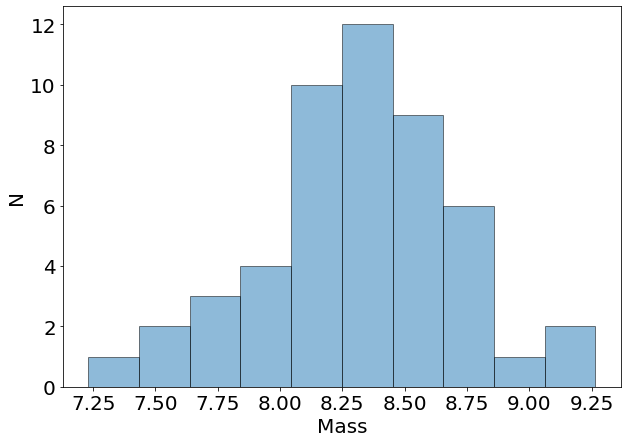

In [66]:
from astroML.plotting import hist
figure(figsize=(10,7))
hist(data[:,0], ec='k', alpha =0.5, bins ='freedman')
xlabel('Mass', fontsize=20)
ylabel('N', fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
show()

In [67]:
x, sigma = data[:,0], data[:,1]

In [3]:
# Creating a range of mean values of the data
model_mass=np.arange(7,10,0.01) 
len(model_mass)

300

In [69]:
# Calculating the chi^2 value for each mean value above
chi_sq = []
for i in range(len(model_mass)):
    chi = (np.sum(((x - model_mass[i] )**2)/sigma**2))/len(x)
    chi_sq.append(chi)

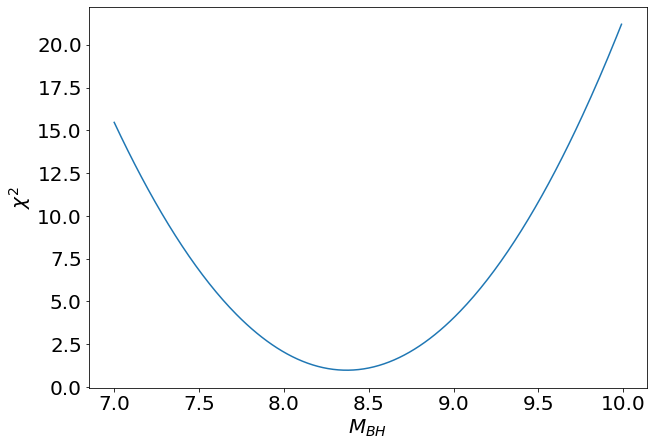

<Figure size 432x288 with 0 Axes>

In [70]:
# Plot chi^2 vs model mass
figure(figsize=(10,7))
plot(model_mass, chi_sq)
xlabel('$M_{BH}$', fontsize=20)
ylabel('$\chi^2$', fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
show()
tight_layout()

In [71]:
# Calculating weights
w = 1/(sigma**2)
# Calculating the uncertainty for the mean_o
unty = (np.sum(w))**(-1/2)
# Calculating the best mean value for our model
mean_o = np.sum(w*x)/np.sum(w)
print('Calculated mass mean: %.2f' % mean_o)
print('Calculated uncertainty: %.2f' % unty)

Calculated mass mean: 8.37
Calculated uncertainty: 0.05


In [74]:
data_mock = data[idx]

        Use astropy.visualization.hist instead. [warnings]
        Use astropy.visualization.hist instead. [warnings]


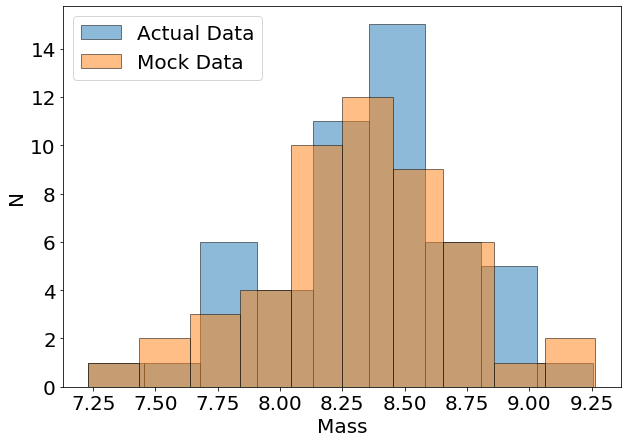

In [75]:
figure(figsize=(10,7))
hist(data_mock[:,0], ec='k', alpha =0.5, bins ='freedman', label= 'Actual Data')
hist(data[:,0], ec='k', alpha =0.5, bins ='freedman', label='Mock Data')
xlabel('Mass', fontsize=20)
ylabel('N', fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
legend(fontsize=20)
show()

In [81]:
mean_list = []
unty_list = []
for i in range(1000):
    idx = np.random.randint(0,len(data_mock), size=len(data_mock))
    data_mock = data[idx][:,0]
    sigma_mock = sigma[idx]
    w = 1/(sigma_mock**2)
    unty = (np.sum(w))**(-1/2)
    mean_o = np.sum(w*data_mock)/np.sum(w)
    mean_list.append(mean_o)

        Use astropy.visualization.hist instead. [warnings]


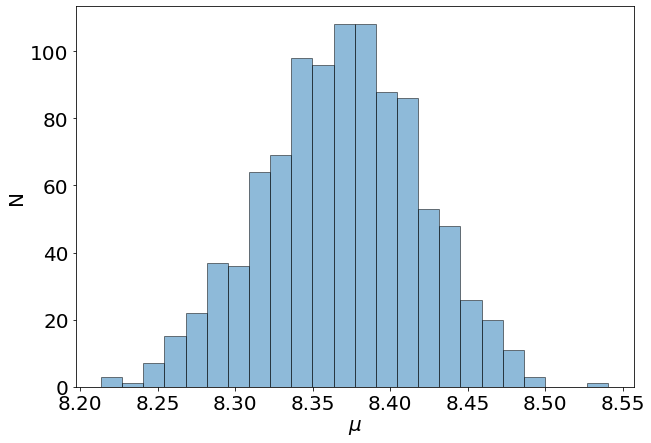

In [87]:
figure(figsize=(10,7))
hist(mean_list, ec='k', alpha =0.5, bins ='freedman')
xlabel('$\mu$', fontsize=20)
ylabel('N', fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
show()